In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn import covariance
import networkx as nx
from exchange.ftx.client import FtxClient

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

client = FtxClient()


In [71]:
minimum_date = datetime.fromisoformat('2021-01-01 00:00:00+00:00')
minimum_volume = 1000000
resolution = '4h'
futures = client.get_futures()
perps = []
for future in futures:
    if 'PERP' in future['name'] and future['volumeUsd24h'] > minimum_volume:
        perps.append(future['name'])

#perps = ['BTC-PERP', 'ETH-PERP', 'SOL-PERP', 'AVAX-PERP', 'MATIC-PERP', 'XRP-PERP', 'BNB-PERP', 'AAVE-PERP', 'ADA-PERP', 'LINK-PERP', 'DOT-PERP', 'FTT-PERP', 'DOGE-PERP', 'SAND-PERP', 'LTC-PERP', 'TRX-PERP', 'BCH-PERP', 'AXS-PERP', 'EOS-PERP', 'SNX-PERP', 'SUSHI-PERP', 'ETC-PERP', 'ALT-PERP', 'SHIT-PERP', 'DEFI-PERP', 'ZEC-PERP', 'XMR-PERP', 'PRIV-PERP']
#perps = ['ZEC-PERP', 'XMR-PERP']

ohlc = {}
prices = {}
for perp in perps:
    data = []
    try:
        data = pd.read_parquet('C:/Users/Walid/Desktop/Workspace/data/{}_{}.parquet.gzip'.format(perp, resolution))
    except:
        print('Cannot find {} data'.format(perp))
    
    if len(data) > 0:
        data['startTime'] = data['startTime'].apply(lambda x: datetime.fromisoformat(x))
        ohlc[perp] = data.set_index('startTime')
        prices[perp] = ohlc[perp]['close']

prices_df = pd.DataFrame(prices)[minimum_date:].T.dropna().T
prices_df

Cannot find GAL-PERP data
Cannot find OP-PERP data


,1INCH-PERP,AAVE-PERP,ADA-PERP,ALGO-PERP,ALT-PERP,ASD-PERP,ATOM-PERP,AVAX-PERP,BAL-PERP,BCH-PERP,...,TRX-PERP,UNI-PERP,USDT-PERP,VET-PERP,WAVES-PERP,XLM-PERP,XRP-PERP,XTZ-PERP,YFI-PERP,ZEC-PERP
startTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,1.2617,88.62,0.183250,0.3603,1067.30,0.03654,6.1835,3.129,14.2175,351.50,...,0.027152,5.170,1.0011,0.019635,6.1795,0.131025,0.227200,2.0780,23290.0,65.57
2021-01-01 04:00:00+00:00,1.2397,86.72,0.179860,0.3586,1053.95,0.03664,6.0355,3.194,14.0225,346.85,...,0.026842,5.011,1.0013,0.019515,6.2220,0.132250,0.229450,2.0274,22310.0,64.78
2021-01-01 08:00:00+00:00,1.1761,88.15,0.179985,0.3677,1060.00,0.03697,6.0250,3.539,14.2250,349.05,...,0.027065,5.022,1.0014,0.020070,6.0955,0.134400,0.237350,2.0455,22400.0,66.37
2021-01-01 12:00:00+00:00,1.1711,87.45,0.180765,0.4091,1055.85,0.03703,5.9390,3.661,14.3250,345.95,...,0.027062,4.790,1.0014,0.019790,6.3010,0.133875,0.242925,2.1088,22355.0,65.90
2021-01-01 16:00:00+00:00,1.1377,87.12,0.174615,0.3933,1031.00,0.03687,5.8215,3.574,13.8325,338.45,...,0.026687,4.835,1.0013,0.019035,6.0000,0.133150,0.233750,2.0117,21760.0,56.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-02 00:00:00+00:00,1.1617,146.14,0.783500,0.5982,3111.70,0.17951,18.0010,58.720,12.8400,285.30,...,0.071212,7.005,0.9999,0.048195,13.0825,0.175300,0.618825,2.5511,17180.0,123.18
2022-05-02 04:00:00+00:00,1.1710,145.97,0.787675,0.5956,3119.55,0.18071,18.1120,59.410,12.9975,286.15,...,0.073042,6.981,0.9999,0.048205,13.1260,0.175850,0.623675,2.5538,17110.0,121.69
2022-05-02 08:00:00+00:00,1.1250,141.00,0.771275,0.5832,3058.15,0.18109,17.3535,56.991,12.4300,280.85,...,0.069405,6.705,0.9999,0.046985,12.4645,0.173100,0.609550,2.4693,16865.0,116.67


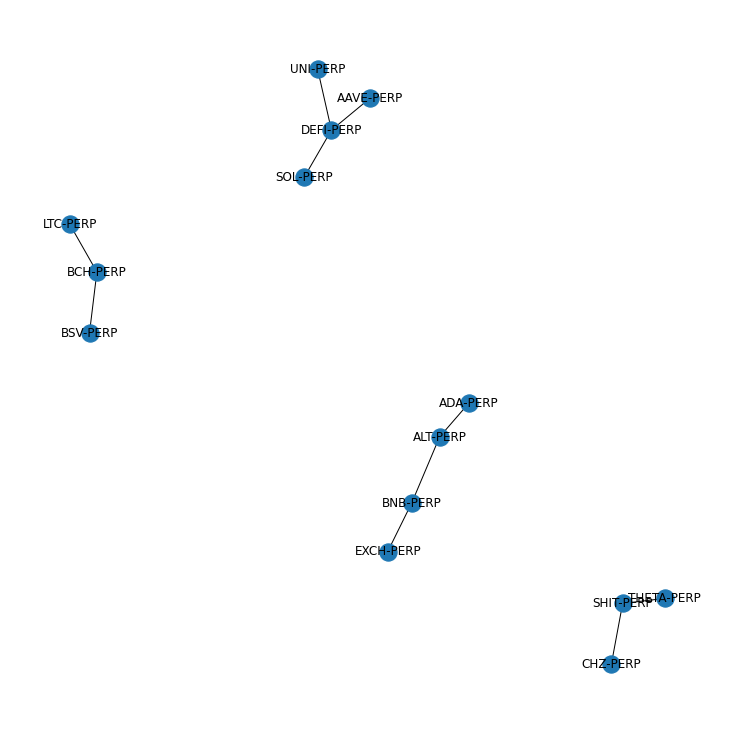

In [74]:
log_returns = np.log1p(prices_df.pct_change())[1:]

edge_model = covariance.GraphicalLassoCV()
log_returns /= log_returns.std(axis=0)
edge_model.fit(log_returns)
p = edge_model.precision_

#prepare the matrix for network illustration
p = pd.DataFrame(p, columns=prices_df.columns, index=prices_df.columns)
links = p.stack().reset_index()
links.columns = ['var1', 'var2','value']
links=links.loc[ (abs(links['value']) > 0.17) &  (links['var1'] != links['var2']) ]
#build the graph using networkx lib
G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
pos = nx.spring_layout(G, k=0.2*1/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(10, 10))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

In [12]:
nx.write_gexf(G, 'graph2.gexf')